<h2><center> Scraping Presidential Speeches & Preparing the Speeches for Text Analysis </h2></center> 

<i> <b> Burcu Kolcak, Last Updated: February, 2022 </b> </i>

<i> *** Some parts of the code for scraping is adapted from: [Marc Stacy](http://ouinformatics.github.io/swc_beautiful_soup/) and [Zhanna Terechshenko](https://github.com/zterechshenko)'s code examples for web scraping.</i>

This notebook consists of two main parts. The first part provides code for scraping and parsing presidential speeches for all U.S. presidents from the website ['The American Presidency Project'(APP)](https://www.presidency.ucsb.edu/). The second part of the code very briefly demonstrates how to import and clean the scraped data, which is stored as text files, and prepare for various types of quantitative text analysis. 

## Preliminary Notes 

<i> <h3> The Scope of the Scraper </h3> </i>

The code iterates over every U.S. President's entire presidency period with a focus on 'presidential' document category. While code is restricted to 'presidential' speeches, it can be easily modified for scraping other document categories, e.g. declarations, executive orders, and time periods.

More specifically, the code scrapes the documents with the following criteria: 
- <b>document category </b>: set manually to 'presidential' using 'document category' tab 
- <b>presidents</b>: set manually for each president using the 'presidents' tab
- <b> presidential periods</b>: set manually for each president using 'from date' and 'to date' tabs 
- <b>per page</b>: set manually to 100 using '# per page' 

For example, for George Washington, the query looks like follows: 

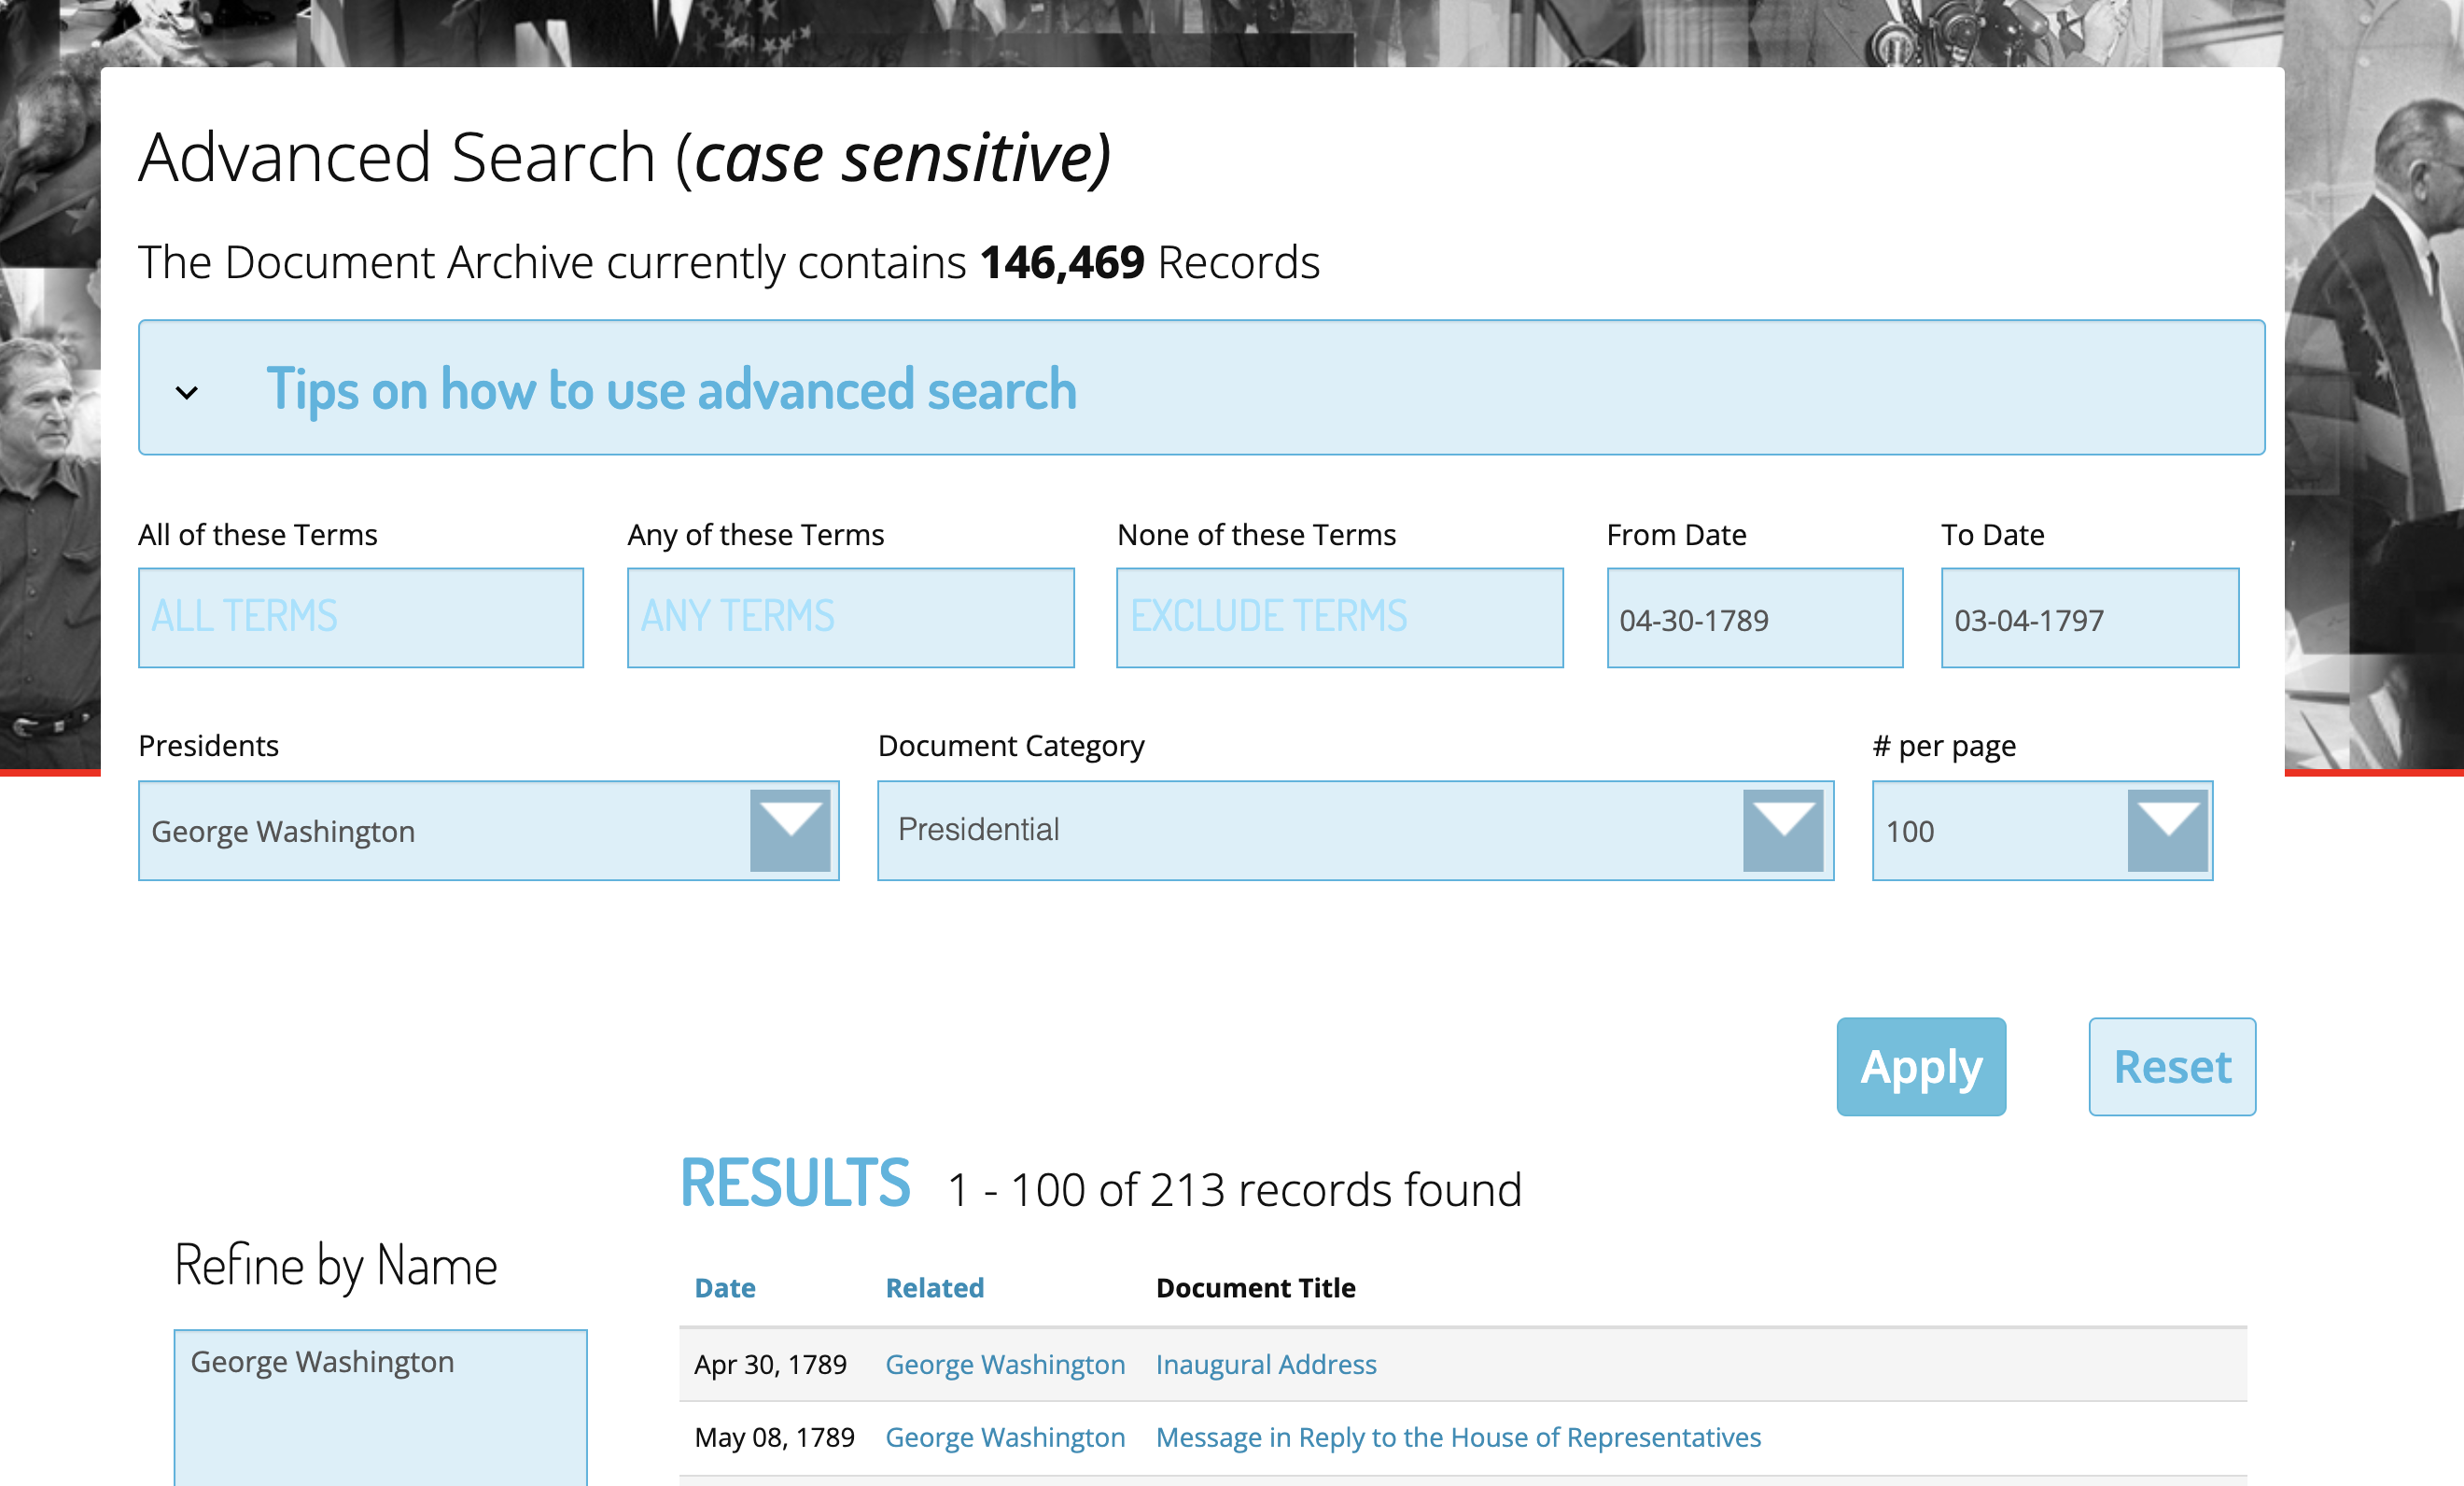

<i> <h3> How to Modify the Code? </h3> </i>

#### Modifying the Scope of the Scraper  

Because the code creates lists of url links for each president seperately, you can easily tweak the code for the president(s) you would need for your analysis by changing the url preferences in Step 3.

Each code chunk in Step 3 uses a specific url that is obtained by setting up the preferences of the advanced query. 

- For example, for George Washington, the main url is as follows: 

"https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-30-1789&to%5Bdate%5D=03-04-1797&person2=200257&category2%5B%5D=406&items_per_page=100"

- While this allows to link the code to the url for Washington, we need to specify two more things: 1) that we would like to iterate over pages, 2) and a variable that can be used as an index in an array. Together with these, the final url for Washington becomes: 

"https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-30-1789&to%5Bdate%5D=03-04-1797&person2=200257&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i

<b> Example:</b> Suppose that we would like to scrape the "Spoken Addresses and Remarks" for Washington instead of presidential speeches. Then, the url we use in Step 3 becomes as follows: 

"https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-30-1789&to%5Bdate%5D=03-04-1797&person2=200257&category2%5B%5D=8&items_per_page=100" + "&page=%s" % i

#### Setting the Working Directory & Storing the Code 

First, we need to set the working directory to a directory where we want to store our folder. For example, I store my folder(s) in my Dropbox. 

In [368]:
cd '/Users/burcukolcak/Dropbox'

/Users/burcukolcak/Dropbox


The scraper offers two ways to scrape the code: 1) a nested loop that scrapes all speeches of presidents under one folder, 2) seperate loops that scrapes each president's speeches under seperate folders. You can see these options in Step 4. 

1) If you use the nested loop, I would suggest creating one general folder before you run the code. You can then refer to this folder in the nested loop in Step 4. Here are the instructions to create a folder in your designated directory.

Using the code chunk below you can create a folder for storing all the speeches under one folder. Step 1 focuses on the modules necessary for the scraper. For creating folders, the os module will be sufficient. 

In [374]:
import os # for directories
folder = 'all_presidents' # create a folder
parent_dir = '/Users/burcukolcak/Dropbox' # working directory where I want to store my folder
path = os.path.join(parent_dir, folder) # join the parent dir with the folder 
os.mkdir(path) # create a directory/file
print("Folder '% s' created" % folder)

Folder 'all_presidents' created


2) If you instead prefer to use seperate loops for each president, I would suggest creating one general folder alongside with subfolders before you run the code. You can then refer to this main folder and subfolders in Step 4. Here are the instructions to create one main folder with subfolders in your designated directory.

In [186]:
folder = 'seperate_presidents' # create a folder 
parent_dir = '/Users/burcukolcak/Dropbox' # working directory where I want to store my folder
path = os.path.join(parent_dir, folder) # join the parent dir with the folder 
os.mkdir(path) # create a directory/file
print("Folder '% s' created" % folder)

Folder 'seperate_presidents' created


In [193]:
parent_dir = '/Users/burcukolcak/Dropbox/seperate_presidents' # working directory where I want to store my folder
# create a list for subfolders 
presidents = ['1.washington', '2.adams', '3.jefferson','4.madison','5.monroe','6.quincy','7.jackson','8.buren',
              '9.harrison','10.tyler','11.polk','12.taylor','13.fillmore','14.pierce','15.buchanan','16.lincoln',
              '17.johnson','18.grant','19.hayes','20.garfield','21.arthur','22.cleveland','23.benjharrison',
              '24.cleveland2','25.mckinley','26.roosevelt','27.taft','28.wilson','29.harding','30.coolidge',
              '31.hoover','32.froosevelt','33.truman','34.eisenhower','35.kennedy','36.johnson','37.nixon',
              '38.ford','39.carter','40.reagan','41.hwbush','42.clinton','43.wbush','44.obama','45.trump','46.biden']
# loop over the list of presidents to create subfolders 
for items in presidents:
    path = os.path.join(parent_dir, items)
    os.mkdir(path)

<i> <h3> Scraped Data </h3> </i>

You can find the scraped data for the presidential speeches of all presidents (including Biden's first year) in the Github repo. 
- The folder **all presidents** store all speeches in one folder
- The **folders with president names** include speeches for the corresponding president.

<i> <h3> List of all US Presidents </h3> </i>

Here is a list of U.S. Presidents with their presidency periods. For presidency periods, you can check this [link](https://www.whitehousehistory.org/the-presidents-timeline) and this [link](https://www.presidency.ucsb.edu/presidents). 

1.	George Washington (April 30, 1789 to March 04, 1797)
2.	John Adams (March 04, 1797 to March 04, 1801)
3.	Thomas Jefferson (March 04, 1801 to March 04, 1809)
4.	James Madison (March 04, 1809 to March 04, 1817) 
5.	James Monroe (March 04, 1817 to March 04, 1825)
6.	John Quincy Adams (March 04, 1825 to March 04, 1829) 
7.	Andrew Jackson (March 04, 1829 to March 04, 1837) 
8.	Martin Van Buren (March 04, 1837 to March 04, 1841) 
9.	William Henry Harrison (March 04, 1841 to April 04, 1841) 
10.	John Tyler (April 06, 1841 to March 04, 1845) 
11.	James K. Polk (March 04, 1845 to March 04, 1849)
12.	Zachary Taylor (March 04, 1849 to July 09, 1850) 
13.	Millard Fillmore (July 10, 1850 to March 04, 1853) 
14.	Franklin Pierce (March 04, 1853 to March 04, 1857) 
15.	James Buchanan (March 04, 1857 to March 04, 1861) 
16.	Abraham Lincoln (March 04, 1861 to April 15, 1865) 
17.	Andrew Johnson (April 15, 1865 to March 04, 1869) 
18.	Ulysses S. Grant (March 04, 1869 to March 04, 1877) 
19.	Rutherford B. Hayes (March 04, 1877 to March 04, 1881) 
20.	James Garfield (March 04, 1881 to September 19, 1881) 
21.	Chester A. Arthur (September 20, 1881 to March 04, 1885) 
22.	Grover Cleveland (March 04, 1885 to March 04, 1889) 
23.	Benjamin Harrison (March 04, 1889 to March 04, 1893) 
24.	Grover Cleveland (March 04, 1893 to March 04, 1897) 
25.	William McKinley (March 04, 1897 to September 14, 1901) 
26.	Theodore Roosevelt (September 14, 1901 to March 04, 1909) 
27.	William Howard Taft (March 04, 1909 to March 04, 1913) 
28.	Woodrow Wilson (March 04, 1913 to March 04, 1921) 
29.	Warren G. Harding (March 04, 1921 to August 02, 1923) 
30.	Calvin Coolidge (August 03, 1923 to March 04, 1929) 
31.	Herbert Hoover (March 04, 1929 to March 04, 1933) 
32.	Franklin D. Roosevelt (March 04, 1933 to April 12, 1945) 
33.	Harry S. Truman (April 12, 1945 to January 20, 1953) 
34.	Dwight D. Eisenhower(January 20, 1953 to January 20, 1961) 
35.	John F. Kennedy (January 20, 1961 to November 22, 1963) 
36.	Lyndon B. Johnson (November 22, 1963 to January 20, 1969) 
37.	Richard M. Nixon (January 20, 1969 to August 09, 1974) 
38.	Gerald R. Ford (August 09, 1974 to January 20, 1977) 
39.	Jimmy Carter (January 20, 1977 to January 20, 1981) 
40.	Ronald Reagan (January 20, 1981 to January 20, 1989) 
41.	George H. W. Bush (January 20, 1989 to January 20, 1993) 
42.	William J. Clinton (January 20, 1993 to January 20, 2001) 
43.	George W. Bush (January 20, 2001 to January 20, 2009) 
44.	Barack Obama (January 20, 2009 to January 20, 2017) 
45.	Donald J. Trump (January 20, 2017 to January 20, 2021) 
46. Joe R. Biden* (January 20, 2021 - present) 

**The scraper covers the first year of Joe Biden's presidency, January 20, 2021 - January 20, 2022*

## Part I. Scraping Presidential Speeches

<i> <h3> Step 1. Import necessary modules </h3> </i>

In [196]:
import os # for directories 
import numpy as np # for N-dimensional arrays
import pandas as pd # for data manipulation and analysis 
from bs4 import BeautifulSoup # for scraping data out of HTML and XML files
from urllib.request import urlopen # for opening urls 
import re # for regular expressions 
import wget # for url network downloader 
import requests # for sending HTTP/1.1 requests  
from datetime import datetime # for manupilating dates and times 
import random # for implementing pseudo-random number generators 
import uuid # for immutable UUID objects 
import matplotlib.pyplot as plt # for MATLAB-like plotting
import glob # for returning file paths matching a pattern
import csv # for csv file reading and writing 
from gensim.parsing import # for parsing and preprocessing text 
from gensim.models import Word2Vec # for implementing the word2vec algorithms

<i> <h3> Step 2. Define main functions </h3> </i>

### Function 1: function for getting url links

In [197]:
## aim: extract links for presidential speeches for each president from the presidential speech website 
## for loop iterates over all the speeches
## find_all('a', href) -> searchers for the anchor tags which is often followed by a speech link. 
## All of the speeches start with /documents 
def getLinks(url):
    # Open the url 
    html_page = urlopen(url)
    # create an instance of the BeautifulSoup class to parse the document
    soup = BeautifulSoup(html_page)
    # create a list for storing the links 
    links = []
    # An anchor tag generally has the href attribute, which states the URL of the webpage
    # Here the loop is iterating over all anchor tags that has href attribute 
    for a in soup.find_all('a', href = True):
        # all speeches start with /documents
        # there are also instances where documents link to category atrributes 
        # or archieve book
        if a['href'].startswith('/documents/'):
            if a['href'].startswith('/documents/category-attributes'):
                continue
            elif a['href'].startswith('/documents/presidential-documents-archive-guidebook'):
                continue
                # appends the links that has been found 
            links.append(a['href'])

    return links

### Function 2: function for arranging the structure of text

In [198]:
## aim: arrange the structure of scraped text before writing a txt file  
def replace_with_newlines(element):
    # create an empty string for storing text 
    text = ''
    # get the descendants of each element
    for elem in element.recursiveChildGenerator():
        # if the element is a string then strip the element and 
        # add to text 
        if isinstance(elem, str):
            text += elem.strip()
            # after the condition above is met, check the line breaks
        elif elem.name == 'br':
            # add \n (new line character) for line break instances
            text += '\n'

    return text

<i> <h3> Step 3. Store links for all presidents </h3> </i>

### 1. George Washington (April 30, 1789 to March 04, 1797)

In [199]:
washington = [] # create an empty list for washington 
# for loop over all the pages - in total 3 pages
for i in range(0, 3):
    # assign url to the washington page with the pagination indicator and page number variable variable
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-30-1789&to%5Bdate%5D=03-04-1797&person2=200257&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url) # use the getLinks function defined in Step 2 to get urls 
    washington.append(l) # append the links 
washington_list = [item for sublist in washington for item in sublist] # escape the list from the sublist 
len(washington_list) # check the length  

213

### 2. John Adams (March 04, 1797 to March 04, 1801)

In [201]:
adams = []
for i in range(0, 1):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1797&to%5Bdate%5D=03-04-1801&person2=200258&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    adams.append(l)
adams_list = [item for sublist in adams for item in sublist]
len(adams_list)

90

### 3. Thomas Jefferson (March 04, 1801 to March 04, 1809)

In [202]:
jefferson = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1801&to%5Bdate%5D=03-04-1809&person2=200259&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    jefferson.append(l)
jefferson_list = [item for sublist in jefferson for item in sublist]
len(jefferson_list)

186

### 4. James Madison (March 04, 1809 to March 04, 1817) 

In [203]:
madison = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1809&to%5Bdate%5D=03-04-1817&person2=200260&category2%5B0%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    madison.append(l)
madison_list = [item for sublist in madison for item in sublist]
len(madison_list)

121

### 5. James Monroe (March 04, 1817 to March 04, 1825)

In [204]:
monroe = []
for i in range(0, 3):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1817&to%5Bdate%5D=03-04-1825&person2=200261&category2%5B0%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    monroe.append(l)
monroe_list = [item for sublist in monroe for item in sublist]
len(monroe_list)

276

### 6. John Quincy Adams (March 04, 1825 to March 04, 1829) 

In [205]:
quincy = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1825&to%5Bdate%5D=03-04-1829&person2=200262&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    quincy.append(l)
quincy_list = [item for sublist in quincy for item in sublist]
len(quincy_list)

175

### 7. Andrew Jackson (March 04, 1829 to March 04, 1837) 

In [206]:
jackson = []
for i in range(0, 4):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1829&to%5Bdate%5D=03-04-1837&person2=200263&category2%5B0%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    jackson.append(l)
jackson_list = [item for sublist in jackson for item in sublist]
len(jackson_list)

374

### 8. Martin Van Buren (March 04, 1837 to March 04, 1841) 

In [207]:
buren = []
for i in range(0, 3):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1837&to%5Bdate%5D=03-04-1841&person2=200264&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    buren.append(l)
buren_list = [item for sublist in buren for item in sublist]
len(buren_list)

236

### 9.	William Henry Harrison (March 04, 1841 to April 04, 1841) 

In [208]:
harrison = []
for i in range(0, 1):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1841&to%5Bdate%5D=04-04-1841&person2=200265&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    harrison.append(l)
harrison_list = [item for sublist in harrison for item in sublist]
len(harrison_list)

3

### 10.	John Tyler (April 06, 1841 to March 04, 1845) 

In [209]:
tyler = []
for i in range(0, 3):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-06-1841&to%5Bdate%5D=03-04-1845&person2=200266&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    tyler.append(l)
tyler_list = [item for sublist in tyler for item in sublist]
len(tyler_list)

230

### 11.	James K. Polk (March 04, 1845 to March 04, 1849)

In [210]:
polk = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1845&to%5Bdate%5D=03-04-1849&person2=200267&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    polk.append(l)
polk_list = [item for sublist in polk for item in sublist]
len(polk_list)

198

### 12.	Zachary Taylor (March 04, 1849 to July 09, 1850) 

In [211]:
taylor = []
for i in range(0, 1):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1849&to%5Bdate%5D=07-09-1850&person2=200268&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    taylor.append(l)
taylor_list = [item for sublist in taylor for item in sublist]
len(taylor_list)

51

### 13.	Millard Fillmore (July 10, 1850 to March 04, 1853) 

In [212]:
fillmore = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=07-10-1850&to%5Bdate%5D=03-04-1853&person2=200269&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    fillmore.append(l)
fillmore_list = [item for sublist in fillmore for item in sublist]
len(fillmore_list)

172

### 14.	Franklin Pierce (March 04, 1853 to March 04, 1857) 

In [213]:
pierce = []
for i in range(0, 4):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1853&to%5Bdate%5D=03-04-1857&person2=200270&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    pierce.append(l)
pierce_list = [item for sublist in pierce for item in sublist]
len(pierce_list)

303

### 15.	James Buchanan (March 04, 1857 to March 04, 1861) 

In [214]:
buchanan = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1857&to%5Bdate%5D=03-04-1861&person2=200271&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    buchanan.append(l)
buchanan_list = [item for sublist in buchanan for item in sublist]
len(buchanan_list)

193

### 16.	Abraham Lincoln (March 04, 1861 to April 15, 1865) 

In [215]:
lincoln = []
for i in range(0, 5):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1861&to%5Bdate%5D=03-15-1865&person2=200272&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    lincoln.append(l)
lincoln_list = [item for sublist in lincoln for item in sublist]
len(lincoln_list)

432

### 17.	Andrew Johnson (April 15, 1865 to March 04, 1869) 

In [216]:
johnson = []
for i in range(0, 6):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-15-1865&to%5Bdate%5D=03-04-1869&person2=200273&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    johnson.append(l)
johnson_list = [item for sublist in johnson for item in sublist]
len(johnson_list)

506

### 18.	Ulysses S. Grant (March 04, 1869 to March 04, 1877) 

In [217]:
grant = []
for i in range(0, 5):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1869&to%5Bdate%5D=03-04-1877&person2=200274&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    grant.append(l)
grant_list = [item for sublist in grant for item in sublist]
len(grant_list)

496

### 19.	Rutherford B. Hayes (March 04, 1877 to March 04, 1881) 

In [218]:
hayes = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1877&to%5Bdate%5D=03-04-1881&person2=200275&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    hayes.append(l)
hayes_list = [item for sublist in hayes for item in sublist]
len(hayes_list)

163

### 20.	James Garfield (March 04, 1881 to September 19, 1881) 

In [219]:
garfield = []
for i in range(0, 1):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1881&to%5Bdate%5D=09-19-1881&person2=200276&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    garfield.append(l)
garfield_list = [item for sublist in garfield for item in sublist]
len(garfield_list)

4

### 21.	Chester A. Arthur (September 20, 1881 to March 04, 1885) 

In [220]:
arthur = []
for i in range(0, 5):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=09-20-1881&to%5Bdate%5D=03-04-1885&person2=200277&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    arthur.append(l)
arthur_list = [item for sublist in arthur for item in sublist]
len(arthur_list)

464

### 22.	Grover Cleveland (March 04, 1885 to March 04, 1889) 

In [221]:
cleveland = []
for i in range(0, 7):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1885&to%5Bdate%5D=03-04-1889&person2=200278&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    cleveland.append(l)
cleveland_list = [item for sublist in cleveland for item in sublist]
len(cleveland_list)

653

### 23.	Benjamin Harrison (March 04, 1889 to March 04, 1893) 

In [222]:
benjharrison = []
for i in range(0, 4):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1889&to%5Bdate%5D=03-04-1893&person2=200279&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    benjharrison.append(l)
benjharrison_list = [item for sublist in benjharrison for item in sublist]
len(benjharrison_list)

333

### 24.	Grover Cleveland (March 04, 1893 to March 04, 1897) 

In [223]:
cleveland2 = []
for i in range(0, 4):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1893&to%5Bdate%5D=03-04-1897&person2=200280&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    cleveland2.append(l)
cleveland2_list = [item for sublist in cleveland2 for item in sublist]
len(cleveland2_list)

307

### 25.	William McKinley (March 04, 1897 to September 14, 1901) 

In [224]:
mckinley = []
for i in range(0, 3):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1893&to%5Bdate%5D=09-14-1901&person2=200281&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    mckinley.append(l)
mckinley_list = [item for sublist in mckinley for item in sublist]
len(mckinley_list)

258

### 26.	Theodore Roosevelt (September 14, 1901 to March 04, 1909) 

In [225]:
roosevelt = []
for i in range(0, 6):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=09-14-1901&to%5Bdate%5D=03-04-1909&person2=200282&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    roosevelt.append(l)
roosevelt_list = [item for sublist in roosevelt for item in sublist]
len(roosevelt_list)

600

### 27.	William Howard Taft (March 04, 1909 to March 04, 1913) 

In [226]:
taft = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1909&to%5Bdate%5D=03-04-1913&person2=200283&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    taft.append(l)
taft_list = [item for sublist in taft for item in sublist]
len(taft_list)

111

### 28.	Woodrow Wilson (March 04, 1913 to March 04, 1921) 

In [227]:
wilson = []
for i in range(0, 4):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1913&to%5Bdate%5D=03-04-1921&person2=200284&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    wilson.append(l)
wilson_list = [item for sublist in wilson for item in sublist]
len(wilson_list)

400

### 29.	Warren G. Harding (March 04, 1921 to August 02, 1923) 

In [228]:
harding = []
for i in range(0, 1):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1921&to%5Bdate%5D=08-02-1923&person2=200285&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    harding.append(l)
harding_list = [item for sublist in harding for item in sublist]
len(harding_list)

94

### 30.	Calvin Coolidge (August 03, 1923 to March 04, 1929) 

In [229]:
coolidge = []
for i in range(0, 2):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=08-03-1923&to%5Bdate%5D=03-04-1929&person2=200286&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    coolidge.append(l)
coolidge_list = [item for sublist in coolidge for item in sublist]
len(coolidge_list)

200

### 31.	Herbert Hoover (March 04, 1929 to March 04, 1933) 

In [230]:
hoover = []
for i in range(0, 17):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1929&to%5Bdate%5D=03-04-1933&person2=200287&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    hoover.append(l)
hoover_list = [item for sublist in hoover for item in sublist]
len(hoover_list)

1674

### 32.	Franklin D. Roosevelt (March 04, 1933 to April 12, 1945) 

In [231]:
froosevelt = []
for i in range(0, 26):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=03-04-1933&to%5Bdate%5D=04-12-1945&person2=200288&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    froosevelt.append(l)
froosevelt_list = [item for sublist in froosevelt for item in sublist]
len(froosevelt_list)

2544

### 33.	Harry S. Truman (April 12, 1945 to January 20, 1953) 

In [232]:
truman = []
for i in range(0, 36):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=04-12-1945&to%5Bdate%5D=01-20-1953&person2=200289&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    truman.append(l)
truman_list = [item for sublist in truman for item in sublist]
len(truman_list)

3571

### 34.	Dwight D. Eisenhower(January 20, 1953 to January 20, 1961) 

In [233]:
eisenhower = []
for i in range(0, 35):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1953&to%5Bdate%5D=01-20-1961&person2=200290&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    eisenhower.append(l)
eisenhower_list = [item for sublist in eisenhower for item in sublist]
len(eisenhower_list)

3418

### 35.	John F. Kennedy(January 20, 1961 to November 22, 1963) 

In [234]:
kennedy = []
for i in range(0, 20):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1961&to%5Bdate%5D=11-22-1963&person2=200291&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    kennedy.append(l)
kennedy_list = [item for sublist in kennedy for item in sublist]
len(kennedy_list)

1922

### 36.	Lyndon B. Johnson(November 22, 1963 to January 20, 1969) 

In [235]:
lynjohnson = []
for i in range(0, 41):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=11-22-1963&to%5Bdate%5D=01-20-1969&person2=200292&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    lynjohnson.append(l)
lynjohnson_list = [item for sublist in lynjohnson for item in sublist]
len(lynjohnson_list)

4045

### 37.	Richard M. Nixon(January 20, 1969 to August 09, 1974) 

In [236]:
nixon = []
for i in range(0, 33):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1969&to%5Bdate%5D=08-09-1974&person2=200293&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    nixon.append(l)
nixon_list = [item for sublist in nixon for item in sublist]
len(nixon_list)

3202

### 38.	Gerald R. Ford(August 09, 1974 to January 20, 1977) 

In [237]:
ford = []
for i in range(0, 26):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=08-09-1974&to%5Bdate%5D=01-20-1977&person2=200294&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    ford.append(l)
ford_list = [item for sublist in ford for item in sublist]
len(ford_list)

2504

### 39.	Jimmy Carter(January 20, 1977 to January 20, 1981) 

In [238]:
carter = []
for i in range(0, 38):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1977&to%5Bdate%5D=01-20-1981&person2=200295&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    carter.append(l)
carter_list = [item for sublist in carter for item in sublist]
len(carter_list)

3712

### 40.	Ronald Reagan(January 20, 1981 to January 20, 1989) 

In [239]:
reagan = []
for i in range(0, 69):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1981&to%5Bdate%5D=01-20-1989&person2=200296&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    reagan.append(l)
reagan_list = [item for sublist in reagan for item in sublist]
len(reagan_list)

6818

### 41.	George H. W. Bush(January 20, 1989 to January 20, 1993) 

In [240]:
hwbush = []
for i in range(0, 43):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1989&to%5Bdate%5D=01-20-1993&person2=200297&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    hwbush.append(l)
hwbush_list = [item for sublist in hwbush for item in sublist]
len(hwbush_list)

4206

### 42.	William J. Clinton(January 20, 1993 to January 20, 2001) 

In [241]:
clinton = []
for i in range(0, 111):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-1993&to%5Bdate%5D=01-20-2001&person2=200298&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    clinton.append(l)
clinton_list = [item for sublist in clinton for item in sublist]
len(clinton_list)

11017

### 43.	George W. Bush(January 20, 2001 to January 20, 2009) 

In [242]:
wbush = []
for i in range(0, 85):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-2001&to%5Bdate%5D=01-20-2009&person2=200299&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    wbush.append(l)
wbush_list = [item for sublist in wbush for item in sublist]
len(wbush_list)

8424

### 44.	Barack Obama(January 20, 2009 to January 20, 2017) 

In [243]:
obama = []
for i in range(0, 81):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-2009&to%5Bdate%5D=01-20-2017&person2=200300&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    obama.append(l)
obama_list = [item for sublist in obama for item in sublist]
len(obama_list)

8047

### 45.	Donald J. Trump (January 20, 2017 to January 20, 2021) 

In [244]:
trump = []
for i in range(0, 32):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-20-2017&to%5Bdate%5D=01-20-2021&person2=200301&category2%5B0%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    trump.append(l)
trump_list = [item for sublist in trump for item in sublist]
len(trump_list)

3200

### 46. Joe Biden (January 20, 2021 - Jan 20, 2022) 

In [245]:
biden = []
for i in range(0, 11):
    url = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=&to%5Bdate%5D=&person2=200320&category2%5B%5D=406&items_per_page=100" + "&page=%s" % i
    l = getLinks(url)
    biden.append(l)
biden_list = [item for sublist in biden for item in sublist]
len(biden_list)

1100

<i> <h3> Step 4. Iterate over the list of presidents & store speeches </h3> </i>

### Option 1: Nested Loop 

In [256]:
# create a general list that stores the speech links for all presidents 
presidents = [washington_list, adams_list, jefferson_list, madison_list,monroe_list,
              quincy_list, jackson_list, buren_list, harrison_list, tyler_list, polk_list,
              taylor_list, fillmore_list, pierce_list, buchanan_list, lincoln_list, johnson_list,
              grant_list, hayes_list, garfield_list, arthur_list, cleveland_list, benjharrison_list,
              cleveland2_list, mckinley_list, roosevelt_list, taft_list, wilson_list, harding_list,
              coolidge_list, hoover_list, froosevelt_list, truman_list, eisenhower_list, kennedy_list,
              johnson_list, nixon_list, ford_list, carter_list, reagan_list, hwbush_list, clinton_list,
              wbush_list, obama_list, trump_list, biden_list]
presidents = [item for sublist in presidents for item in sublist]

73707

In [264]:
print(len(presidents),'speech links in the presidents list') # check the number of links/speeches 

73707 speech links in the presidents list


In [265]:
cd '/Users/burcukolcak/Dropbox/' # set working directory

/Users/burcukolcak/Dropbox


In [378]:
## Aim: loop over all the links in the presidents list 
for link in presidents:
    print(link)
    # send HTTP/1.1 requests to the presidency website for each link in 
    # each president's list
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    # pass HTML parser to BS
    soup = BeautifulSoup(r.text,'html.parser')
    # extract the title, split from the second generic title 
    title = soup.title.text.split(" |")[0]
    # extract the date, class = "date-display-single"
    date = soup.find('span', class_ = 'date-display-single').get_text()
    # create file names, use the universally unique identifier (UUID) to avoid
    # overwriting the speeches with the same name/date
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    # join the file names with the main folder 
    filename_path = os.path.join('all_presidents',filename)

    # Verify if the path doesn't exist 
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        # find all paragraphs <p> 
        # 1,2 is top of the page, last 5 are the bottom of the page
        txt = soup.find_all('p')[2:-5]
        # find the name of the president, title <h3>
        name = soup.find('h3').get_text()
        # create an empty list for storing speeches 
        txts = []
        # use the replace newlines function to structure the text
        for itm in txt:
            result = replace_with_newlines(itm) 
            # append the strings under the txts list 
            txts.append(result)
        # join all strings into one by adding new lines in between
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file: # write file using the content format
                content = ''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc: # if try not work print exc 
            print(exc)
    else:
        print(filename)

/documents/inaugural-address-16
/documents/message-reply-the-house-representatives-7
/documents/message-reply-the-senate-10
/documents/special-message-3744
/documents/special-message-3745
/documents/special-message-3746
/documents/special-message-3416
/documents/special-message-3352
/documents/special-message-3747
/documents/special-message-3337
/documents/special-message-3748
/documents/special-message-3155
/documents/special-message-2308
/documents/special-message-1669
/documents/special-message-807
/documents/special-message-391
/documents/special-message-194
/documents/proclamation-day-national-thanksgiving
/documents/first-annual-address-congress-0
/documents/special-message-3380
/documents/special-message-3361
/documents/special-message-3729
/documents/message-reply-the-senate-6
/documents/message-reply-the-house-representatives-8
/documents/special-message-3749
/documents/special-message-3750
/documents/special-message-3475
/documents/special-message-3751
/documents/special-mess

KeyboardInterrupt: 

### Option 2: Seperate Loops for Each President 

<i> Note: If you pick Option 1, you can skip all the code chunks in Option 2.</i>

In [386]:
cd '/Users/burcukolcak/Dropbox/seperate_presidents/'

/Users/burcukolcak/Dropbox/seperate_presidents


In [387]:
len(washington_list)

213

In [389]:
## Loop over all the links in the washington list 
for link in washington_list:
    print(link)
    # send HTTP/1.1 requests to the presidency website for each link in 
    # each president's list
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    # pass HTML parser to BS
    soup = BeautifulSoup(r.text,'html.parser')
    # extract the title, split from the second generic title 
    title = soup.title.text.split(" |")[0]
    # extract the date, class = "date-display-single"
    date = soup.find('span', class_ = 'date-display-single').get_text()
    # create file names, use the universally unique identifier (UUID) to avoid
    # overwriting the speeches with the same name/date
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    # join the file names with the main folder 
    filename_path = os.path.join('1.washington',filename)

    # Verify if the path doesn't exist 
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        # find all paragraphs <p> 
        # 1,2 is top of the page, last 5 are the bottom of the page
        txt = soup.find_all('p')[2:-5]
        # find the name of the president, title <h3>
        name = soup.find('h3').get_text()
        # create an empty list for storing speeches 
        txts = []
        # use the replace newlines function to structure the text
        for itm in txt:
            result = replace_with_newlines(itm) 
            # append the strings under the txts list 
            txts.append(result)
        # join all strings into one by adding new lines in between
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file: # write file using the content format
                content = ''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc: # if try not work print exc 
            print(exc)
    else:
        print(filename)

/documents/inaugural-address-16
/documents/message-reply-the-house-representatives-7
/documents/message-reply-the-senate-10
/documents/special-message-3744
/documents/special-message-3745
/documents/special-message-3746
/documents/special-message-3416
/documents/special-message-3352
/documents/special-message-3747
/documents/special-message-3337
/documents/special-message-3748
/documents/special-message-3155
/documents/special-message-2308
/documents/special-message-1669
/documents/special-message-807
/documents/special-message-391
/documents/special-message-194
/documents/proclamation-day-national-thanksgiving
/documents/first-annual-address-congress-0
/documents/special-message-3380
/documents/special-message-3361
/documents/special-message-3729
/documents/message-reply-the-senate-6
/documents/message-reply-the-house-representatives-8
/documents/special-message-3749
/documents/special-message-3750
/documents/special-message-3475
/documents/special-message-3751
/documents/special-mess

In [79]:
len(adams_list)

90

In [80]:
for link in adams_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('2.adams',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [81]:
len(jefferson_list)

186

In [82]:
for link in jefferson_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('3.jefferson',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [83]:
len(madison_list)

121

In [84]:
for link in madison_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('4.madison',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [85]:
len(monroe_list)

276

In [86]:
for link in monroe_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('5.monroe',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [87]:
len(quincy_list)

175

In [88]:
for link in quincy_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('6.quincy',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [89]:
len(jackson_list)

374

In [90]:
for link in jackson_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('7.jackson',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [91]:
len(buren_list)

236

In [92]:
for link in buren_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('8.buren',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [93]:
len(harrison_list)

3

In [94]:
for link in harrison_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('9.harrison',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [95]:
len(tyler_list)

230

In [96]:
for link in tyler_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('10.tyler',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [97]:
len(polk_list)

198

In [98]:
for link in polk_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('11.polk',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [99]:
len(taylor_list)

51

In [100]:
for link in taylor_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('12.taylor',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [101]:
len(fillmore_list)

172

In [102]:
for link in fillmore_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('13.fillmore',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [103]:
len(pierce_list)

303

In [104]:
for link in pierce_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('14.pierce',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [105]:
len(buchanan_list)

193

In [106]:
for link in buchanan_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('15.buchanan',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [107]:
len(lincoln_list)

432

In [108]:
for link in lincoln_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('16.lincoln',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [109]:
len(johnson_list)

506

In [110]:
for link in johnson_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('17.johnson',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [111]:
len(grant_list)

496

In [112]:
for link in grant_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('18.grant',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [113]:
len(hayes_list)

163

In [114]:
for link in hayes_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('19.hayes',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [115]:
len(garfield_list)

4

In [116]:
for link in garfield_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('20.garfield',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [117]:
len(arthur_list)

464

In [118]:
for link in arthur_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('21.arthur',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [119]:
len(cleveland_list)

653

In [120]:
for link in cleveland_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('22.cleveland',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [121]:
len(benjharrison_list)

333

In [122]:
for link in benjharrison_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('23.benjharrison',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [123]:
len(cleveland2_list)

307

In [124]:
for link in cleveland2_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('24.cleveland2',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [125]:
len(mckinley_list)

258

In [126]:
for link in mckinley_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('25.mckinley',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [127]:
len(roosevelt_list)

600

In [128]:
for link in roosevelt_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('26.roosevelt',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [129]:
len(taft_list)

111

In [130]:
for link in taft_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('27.taft',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [131]:
len(wilson_list)

400

In [132]:
for link in wilson_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('28.wilson',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [133]:
len(harding_list)

94

In [134]:
for link in harding_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('29.harding',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [135]:
len(coolidge_list)

200

In [390]:
for link in coolidge_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('30.coolidge',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

/documents/statement-the-death-president-harding
/documents/proclamation-death-honorable-warren-gamaliel-harding-president-the-united-states-america
/documents/excerpts-the-presidents-news-conference
/documents/excerpts-the-presidents-news-conference-1
/documents/excerpts-the-presidents-news-conference-0
/documents/excerpts-the-presidents-news-conference-2
/documents/excerpts-the-presidents-news-conference-3
/documents/statement-relief-for-earthquake-victims-japan
/documents/excerpts-the-presidents-news-conference-4
/documents/excerpts-the-presidents-news-conference-5
/documents/excerpts-the-presidents-news-conference-6
/documents/proclamation-national-fire-prevention-day-1923
/documents/excerpts-the-presidents-news-conference-7
/documents/excerpts-the-presidents-news-conference-8
/documents/excerpts-the-presidents-news-conference-9
/documents/proclamation-national-education-week-1923
/documents/excerpts-the-presidents-news-conference-10
/documents/excerpts-the-presidents-news-conferen

/documents/address-the-unveiling-the-equestrian-statue-bishop-francis-asbury-washington-dc
/documents/proclamation-1713-historic-areas-certain-military-reservations-declared-national-monuments
/documents/remarks-delegation-foreign-born-citizens-the-white-house
/documents/excerpts-the-presidents-news-conference-81
/documents/excerpts-the-presidents-news-conference-82
/documents/telephone-remarks-the-federation-jewish-philanthropic-societies-new-york-city-assembled
/documents/radio-address-from-the-white-house-the-duties-citizenship
/documents/excerpts-the-presidents-news-conference-83
/documents/proclamation-1715-thanksgiving-day-1924
/documents/message-william-m-butler-chairman-the-republican-national-committee
/documents/statement-following-victory-the-presidential-election-0
/documents/excerpts-the-presidents-news-conference-84
/documents/excerpts-the-presidents-news-conference-85
/documents/proclamation-american-education-week-1924
/documents/excerpts-the-presidents-news-conference-

In [137]:
len(hoover_list)

1674

In [139]:
for link in hoover_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(title + " " + date + str(uuid.uuid4()))
    filename_path = os.path.join('31.hoover',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [140]:
len(froosevelt_list)

2544

In [141]:
for link in froosevelt_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('32.froosevelt',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [142]:
len(truman_list)

3571

In [143]:
for link in truman_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('33.truman',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [144]:
len(eisenhower_list)

3418

In [145]:
for link in eisenhower_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('34.eisenhower',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [146]:
len(kennedy_list)

1922

In [147]:
for link in kennedy_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('35.kennedy',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [148]:
len(lynjohnson_list)

4045

In [149]:
for link in lynjohnson_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('36.lynjohnson',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [150]:
len(nixon_list)

3202

In [151]:
for link in nixon_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('37.nixon',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [152]:
len(ford_list)

2504

In [153]:
for link in ford_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('38.ford',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [154]:
len(carter_list)

3712

In [155]:
for link in carter_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('39.carter',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [156]:
len(reagan_list)

6818

In [157]:
for link in reagan_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('40.reagan',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [18]:
len(hwbush_list)

4206

In [19]:
for link in hwbush_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('41.hwbush',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [20]:
len(clinton_list)

11017

In [21]:
for link in clinton_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('42.clinton',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [22]:
len(wbush_list)

8424

In [23]:
for link in wbush_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('43.wbush',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [24]:
len(obama_list)

8047

In [25]:
for link in obama_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('44.obama',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [26]:
len(trump_list)

3200

In [27]:
for link in trump_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('45.trump',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

In [28]:
len(biden_list)

1092

In [29]:
for link in biden_list:
    print(link)
    r = requests.get("http://www.presidency.ucsb.edu" + str(link))
    soup = BeautifulSoup(r.text,'html.parser')
    title = soup.title.text.split(" |")[0]

    date = soup.find('span', class_ = 'date-display-single').get_text()
    filename = "{0}.txt".format(date + str(uuid.uuid4()))
    filename_path = os.path.join('46.biden',filename)
    
    if not os.path.exists(filename_path):
        date = soup.find('span', class_ = 'date-display-single').get_text()
        txt = soup.find_all('p')[2:-5]
        name = soup.find('h3').get_text()
        txts = []
        for itm in txt:
            result = replace_with_newlines(itm) 
            txts.append(result)
        txts = '\n'.join(txts)
        try:
            with open(filename_path, "w") as file:
                content=''.join('''{}\n{}\n\n{}\n{}'''.format(name, date, title, txts))
            
                file.write(content)

        except Exception as exc:
            print(exc)
    #else:
     #   print(filename)

## Part II. Preparing the Speeches for Analysis

<i> <h3> Descriptive Statistics: Top 10 Presidents </h3> </i>

Let's illustrate and visualize the top 10 presidents by their number of speeches. 

In [416]:
col = ['# of speeches'] # create a column for # of speeches 
# create a list for president names with their presidency periods 
presidents_list = ['George Washington (April 30, 1789 to March 04, 1797)', 'John Adams (March 04, 1797 to March 04, 1801', 'Thomas Jefferson (March 04, 1801 to March 04, 1809)','James Madison(March 04, 1809 to March 04, 1817)','James Monroe (March 04, 1817 to March 04, 1825)','John Quincy Adams (March 04, 1825 to March 04, 1829)','Andrew Jackson (March 04, 1829 to March 04, 1837)','Martin Van Buren (March 04, 1837 to March 04, 1841)','William Henry Harrison (March 04, 1841 to April 04, 1841)',
                  'John Tyler (April 06, 1841 to March 04, 1845)','James K. Polk (March 04, 1845 to March 04, 1849)','Zachary Taylor (March 04, 1849 to July 09, 1850)','Millard Fillmore (July 10, 1850 to March 04, 1853)','Franklin Pierce (March 04, 1853 to March 04, 1857)','James Buchanan (March 04, 1857 to March 04, 1861)','Abraham Lincoln (March 04, 1861 to April 15, 1865)','Andrew Johnson (April 15, 1865 to March 04, 1869)','Ulysses S. Grant (March 04, 1869 to March 04, 1877)','Rutherford B. Hayes (March 04, 1877 to March 04, 1881)',
                  'James Garfield (March 04, 1881 to September 19, 1881)','Chester A. Arthur (September 20, 1881 to March 04, 1885)','Grover Cleveland (March 04, 1885 to March 04, 1889)','Benjamin Harrison (March 04, 1889 to March 04, 1893)','Grover Cleveland 2 (March 04, 1893 to March 04, 1897)','William McKinley (March 04, 1897 to September 14, 1901)','Theodore Roosevelt  (September 14, 1901 to March 04, 1909)','William Howard Taft (March 04, 1909 to March 04, 1913)',
                  'Woodrow Wilson (March 04, 1913 to March 04, 1921)','Warren G. Harding (March 04, 1921 to August 02, 1923)','Calvin Coolidge (August 03, 1923 to March 04, 1929)','Herbert Hoover (March 04, 1929 to March 04, 1933)','Franklin D. Roosevelt (March 04, 1933 to April 12, 1945)','Harry S. Truman (April 12, 1945 to January 20, 1953)','Dwight D. Eisenhower (January 20, 1953 to January 20, 1961)','John F. Kennedy (January 20, 1961 to November 22, 1963)','Lyndon B. Johnson (November 22, 1963 to January 20, 1969)',
                  'Richard M. Nixon (January 20, 1969 to August 09, 1974)','Gerald R. Ford (August 09, 1974 to January 20, 1977)','Jimmy Carter (January 20, 1977 to January 20, 1981)','Ronald Reagan (January 20, 1981 to January 20, 1989)','George H. W. Bush (January 20, 1989 to January 20, 1993)','William J. Clinton (January 20, 1993 to January 20, 2001)','George W. Bush (January 20, 2001 to January 20, 2009)','Barack Obama (January 20, 2009 to January 20, 2017)','Donald J. Trump (January 20, 2017 to January 20, 2021)','Joe R. Biden* (January 20, 2021 - January 20, 2022)','total']
# create a list for the # of speeches 
data = [len(washington_list),len(adams_list),len(jefferson_list),len(madison_list),len(monroe_list),len(quincy_list),
        len(jackson_list),len(buren_list),len(harrison_list),len(tyler_list),len(polk_list),len(taylor_list),
        len(fillmore_list),len(pierce_list),len(buchanan_list),len(lincoln_list),len(johnson_list),len(grant_list),
        len(hayes_list),len(garfield_list),len(arthur_list),len(cleveland_list),len(benjharrison_list),
        len(cleveland2_list),len(mckinley_list),len(roosevelt_list),len(taft_list),len(wilson_list),len(harding_list),
        len(coolidge_list),len(hoover_list),len(froosevelt_list),len(truman_list),len(eisenhower_list),len(kennedy_list),
        len(johnson_list),len(nixon_list),len(ford_list),len(carter_list),len(reagan_list),len(hwbush_list),len(clinton_list),
        len(wbush_list),len(obama_list),len(trump_list),len(biden_list), total]

In [417]:
desc_dat = pd.DataFrame(data, presidents_list, col) # create a data frame 

In [418]:
desc_dat

,# of speeches
"George Washington (April 30, 1789 to March 04, 1797)",213
"John Adams (March 04, 1797 to March 04, 1801",90
"Thomas Jefferson (March 04, 1801 to March 04, 1809)",186
"James Madison(March 04, 1809 to March 04, 1817)",121
"James Monroe (March 04, 1817 to March 04, 1825)",276
"John Quincy Adams (March 04, 1825 to March 04, 1829)",175
"Andrew Jackson (March 04, 1829 to March 04, 1837)",374
"Martin Van Buren (March 04, 1837 to March 04, 1841)",236
"William Henry Harrison (March 04, 1841 to April 04, 1841)",3
"John Tyler (April 06, 1841 to March 04, 1845)",230


In [422]:
# sort top descending order 
desc_dat.sort_values(by = '# of speeches',ascending = False)

,# of speeches
total,73707
"William J. Clinton (January 20, 1993 to January 20, 2001)",11017
"George W. Bush (January 20, 2001 to January 20, 2009)",8424
"Barack Obama (January 20, 2009 to January 20, 2017)",8047
"Ronald Reagan (January 20, 1981 to January 20, 1989)",6818
"George H. W. Bush (January 20, 1989 to January 20, 1993)",4206
"Jimmy Carter (January 20, 1977 to January 20, 1981)",3712
"Harry S. Truman (April 12, 1945 to January 20, 1953)",3571
"Dwight D. Eisenhower (January 20, 1953 to January 20, 1961)",3418
"Richard M. Nixon (January 20, 1969 to August 09, 1974)",3202


We can visualize the top 10 presidents. 

In [423]:
# create a list for the presidents 
pres_top10 = ['Clinton', 'W. Bush', 'Obama', 'Reagan', 'H.W.Bush', 'Carter', 
              'Truman','Eisenhower','Nixon']
# create a list for the length of speeches
preslen_top10 = [len(clinton_list), len(wbush_list), len(obama_list), len(reagan_list), 
                 len(hwbush_list), len(carter_list), len(truman_list),len(eisenhower_list),len(nixon_list)]

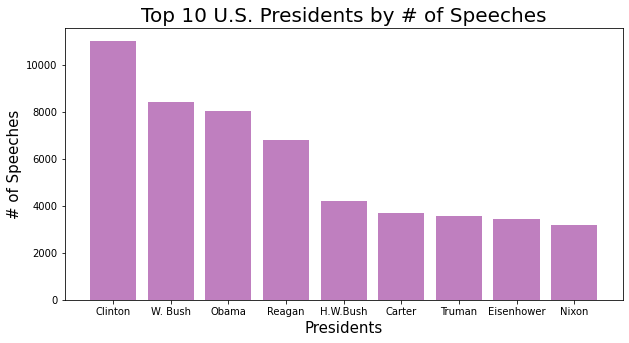

In [437]:
# create a plot 
plt.figure(figsize = (10, 5))
plt.bar(pres_top10,preslen_top10,align = 'center', alpha = 0.5,color = ['purple'])
plt.title('Top 10 U.S. Presidents by # of Speeches', fontsize = 20)
plt.ylabel("# of Speeches", fontsize = 15)
plt.xlabel("Presidents", fontsize = 15)
plt.show()

<i> <h3> Import and Clean Text Files for Text Analysis </h3> </i>

In this section, I focus on the speeches of President Trump to demonstrate how to open text files and write them as a csv file. 

In [325]:
cd "/Users/burcukolcak/Dropbox/seperate_presidents"

/Users/burcukolcak/Dropbox/seperate_presidents


In [326]:
# set main folder to Trump 
main_folder = "45.Trump"

In [327]:
# define a function for getting file names 
def get_filename(path):
    filenames = []
    files = [i.path for i in os.scandir(path) if i.is_file()]

    for filename in files:
        filename = os.path.basename(filename)
        filenames.append(filename)
    return filenames

files = get_filename(main_folder)

In [328]:
# check the number of files  
len(files)

3200

In [329]:
# open and write the txt files as a csv file 
with open('trump_raw.csv', 'w',  encoding = 'utf8', newline = '') as csv_file:
    # loop over txt files in the main folder 
    for _file in files:
        file_name = _file
        with open(main_folder +'//'+ _file,'r') as f:
            text = f.read()
            writer = csv.writer(csv_file)
            writer.writerow([file_name, text])

In [330]:
# read the csv file 
trump_df = pd.read_csv('trump_raw.csv',header=None)

In [331]:
trump_df.head()

,0,1
0,"December 31, 20189d496419-8031-4ab0-b02a-a6a03...","Donald J. Trump\nDecember 31, 2018\n\nMessage ..."
1,"May 21, 201852f90eb7-431d-443b-806a-397c02abf1...","Donald J. Trump\nMay 21, 2018\n\nMessage to th..."
2,"May 25, 201758115c85-4405-45ae-9f24-5fe28017db...","Donald J. Trump\nMay 25, 2017\n\nRemarks at th..."
3,"January 23, 20198ad2246d-cf25-4cac-9c7a-2f78d3...","Donald J. Trump\nJanuary 23, 2019\n\nStatement..."
4,"April 24, 2017f1ce75d3-b1be-4125-83ea-460a03ae...","Donald J. Trump\nApril 24, 2017\n\nStatement o..."


The previous code chunks allows to put everything in a single data frame, save the data frame as a csv file, and read the csv file. However, we still need to clean the data before we can conduct any analysis.

As for the first step, we can rename the variable. names, create new variables, and extract important metadata such as the president name, the date of the speech, and title of the speech as new variables. For some types of analysis, e.g. descriptive inference, sentiment analysis, structural topic modeling (STM), word embeddings, we may want to use metadata. 

In [332]:
# rename and create new variables 
trump_df = trump_df.rename(columns={0: "speech_label", 1: "speech"})
# create a column for the president name 
trump_df['president'] = trump_df['speech'].str.extract('(.*)\n', expand = True)
# create a column for the date
trump_df['date'] = trump_df['speech'].str.extract('\n(.*)', expand = True)
# create a column for the speech name 
trump_df['title'] = trump_df['speech'].str.extract('\n\n(.*)', expand = True)
# indicator id variable for each speech 
trump_df['id'] = np.arange(len(trump_df))

In [333]:
trump_df.head()

,speech_label,speech,president,date,title,id
0,"December 31, 20189d496419-8031-4ab0-b02a-a6a03...","Donald J. Trump\nDecember 31, 2018\n\nMessage ...",Donald J. Trump,"December 31, 2018",Message on National Mentoring Month,0
1,"May 21, 201852f90eb7-431d-443b-806a-397c02abf1...","Donald J. Trump\nMay 21, 2018\n\nMessage to th...",Donald J. Trump,"May 21, 2018",Message to the Congress on Prohibiting Certain...,1
2,"May 25, 201758115c85-4405-45ae-9f24-5fe28017db...","Donald J. Trump\nMay 25, 2017\n\nRemarks at th...",Donald J. Trump,"May 25, 2017",Remarks at the Dedication Ceremony for the Ber...,2
3,"January 23, 20198ad2246d-cf25-4cac-9c7a-2f78d3...","Donald J. Trump\nJanuary 23, 2019\n\nStatement...",Donald J. Trump,"January 23, 2019",Statement Announcing United States Recognition...,3
4,"April 24, 2017f1ce75d3-b1be-4125-83ea-460a03ae...","Donald J. Trump\nApril 24, 2017\n\nStatement o...",Donald J. Trump,"April 24, 2017",Statement on Armenian Remembrance Day,4


Secondly, because the first three lines in our speeches are the president name, date of the speech, and the title of the speech, we can remove these lines from speeches. In addition, we can replace the new line character \n with empty space. 

In [335]:
# remove the first three lines from the speech column (name of president, data, title of speech)
trump_df['speech'] = trump_df['speech'].str.replace('^(.*)\n','',regex = True)
trump_df['speech'] = trump_df['speech'].str.replace('^(.*)\n\n', '', regex = True)
trump_df['speech'] = trump_df['speech'].str.replace('^(.*)\n', '', regex = True)
# replace the new line symbol with empty space 
trump_df['speech'] = trump_df['speech'].str.replace('^(.*)\n', '', regex = True)

In [336]:
trump_df.head()

,speech_label,speech,president,date,title,id
0,"December 31, 20189d496419-8031-4ab0-b02a-a6a03...",As we conclude the holiday season and ring in ...,Donald J. Trump,"December 31, 2018",Message on National Mentoring Month,0
1,"May 21, 201852f90eb7-431d-443b-806a-397c02abf1...",I have authorized the Secretary of the Treasur...,Donald J. Trump,"May 21, 2018",Message to the Congress on Prohibiting Certain...,1
2,"May 25, 201758115c85-4405-45ae-9f24-5fe28017db...",Thank you. Terrible thing.\nThis ceremony is a...,Donald J. Trump,"May 25, 2017",Remarks at the Dedication Ceremony for the Ber...,2
3,"January 23, 20198ad2246d-cf25-4cac-9c7a-2f78d3...",I will continue to use the full weight of Unit...,Donald J. Trump,"January 23, 2019",Statement Announcing United States Recognition...,3
4,"April 24, 2017f1ce75d3-b1be-4125-83ea-460a03ae...",We must remember atrocities to prevent them fr...,Donald J. Trump,"April 24, 2017",Statement on Armenian Remembrance Day,4


<i> <h3> A Very Brief Demonstration: Preprocessing and Word Embeddings  </h3> </i>

Next, we can do some minimal text preprocessing. For demonstration purposes, I use the default filters.

In [375]:
preprocessing.DEFAULT_FILTERS 
# if you don't like any of these default filters, you can piece together your own set of functions
# see the documentation for default values

[<function gensim.parsing.preprocessing.<lambda>(x)>,
 <function gensim.parsing.preprocessing.strip_tags(s)>,
 <function gensim.parsing.preprocessing.strip_punctuation(s)>,
 <function gensim.parsing.preprocessing.strip_multiple_whitespaces(s)>,
 <function gensim.parsing.preprocessing.strip_numeric(s)>,
 <function gensim.parsing.preprocessing.remove_stopwords(s, stopwords=None)>,
 <function gensim.parsing.preprocessing.strip_short(s, minsize=3)>,
 <function gensim.parsing.preprocessing.stem_text(text)>]

In [339]:
# preprocess the speech column 
speeches = preprocessing.preprocess_documents(trump_df['speech'])

In [438]:
speeches[1:10]

[['author',
  'secretari',
  'treasuri',
  'consult',
  'secretari',
  'state',
  'action',
  'includ',
  'promulg',
  'rule',
  'regul',
  'emploi',
  'power',
  'grant',
  'presid',
  'ieepa',
  'necessari',
  'carri',
  'purpos',
  'execut',
  'order',
  'enclos',
  'copi',
  'execut',
  'order',
  'issu',
  'todai',
  'donald',
  'trump',
  'white',
  'hous'],
 ['thank',
  'terribl',
  'thing',
  'ceremoni',
  'dai',
  'remembr',
  'resolv',
  'rememb',
  'mourn',
  'nearli',
  'innoc',
  'peopl',
  'brutal',
  'murder',
  'terrorist',
  'septemb',
  'nato',
  'alli',
  'respond',
  'swiftli',
  'decis',
  'invok',
  'time',
  'histori',
  'articl',
  'collect',
  'defens',
  'commit',
  'recent',
  'attack',
  'manchest',
  'unit',
  'kingdom',
  'demonstr',
  'depth',
  'evil',
  'face',
  'terror',
  'innoc',
  'littl',
  'girl',
  'horribl',
  'murder',
  'badli',
  'injur',
  'attend',
  'concert',
  'beauti',
  'live',
  'great',
  'potenti',
  'torn',
  'famili',
  'forev',


The current structure of the speeches as a list of lists is appropriate for conducting some exploratory word embedddings. However, depending on the type of analysis you would like to do, you may want to use different data structures. 

In [376]:
# implement word2vec embeddings 
speeches_w2v = Word2Vec(speeches, vector_size=300, window=5, min_count=3, workers=2,)

Let's check out some words that Trump uses most similar to the word 'protest', 'order', and 'democrat'. 

In [360]:
speeches_w2v.wv.most_similar('protest')

[('charlottesvil', 0.6329469084739685),
 ('protestor', 0.5993638634681702),
 ('condemn', 0.5456646084785461),
 ('scare', 0.543242871761322),
 ('stahl', 0.5406973958015442),
 ('hate', 0.5345178842544556),
 ('gestur', 0.5315687656402588),
 ('maduro', 0.5296671390533447),
 ('shouldn', 0.5287106037139893),
 ('behav', 0.5268203616142273)]

In [363]:
speeches_w2v.wv.most_similar('order')

[('branch', 0.6302398443222046),
 ('flawlessli', 0.619316041469574),
 ('faithfulli', 0.5621168613433838),
 ('memorandum', 0.5427817702293396),
 ('invoc', 0.537266731262207),
 ('plenari', 0.5367661714553833),
 ('curran', 0.5099621415138245),
 ('aggrandiz', 0.5020420551300049),
 ('clemenc', 0.4784153401851654),
 ('enjoin', 0.4644492268562317)]

In [364]:
speeches_w2v.wv.most_similar('democrat')

[('obstructionist', 0.7634274959564209),
 ('republican', 0.7554096579551697),
 ('mob', 0.6904550194740295),
 ('extrem', 0.6799921989440918),
 ('socialist', 0.6679673790931702),
 ('radic', 0.6673702597618103),
 ('democrats—y', 0.6593099236488342),
 ('lawmak', 0.6508930325508118),
 ('refus', 0.6393638253211975),
 ('resist', 0.6331732273101807)]

Thank you for checking out the code! In the future, I am planning to add a new part that focuses on the analysis of presidential speeches employing quantitative text analysis. 

Please feel free to reach out to me at burcukolcakk@gmail.com if you have any questions or spot any errors! 